# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading data

In [2]:
df = pd.read_csv('datas/housing.csv') # California housing prices from 
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Messing with data

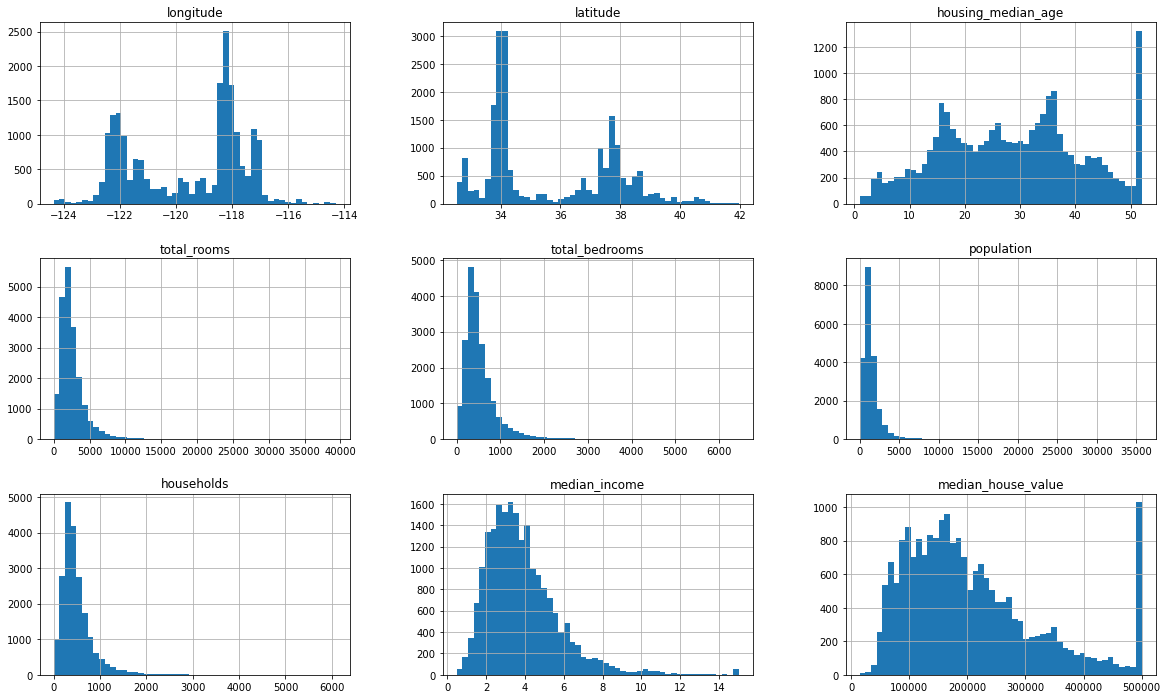

In [5]:
df.hist(bins=50, figsize=(20, 12))
plt.show()

In [6]:
axes = df[['longitude', 'latitude']]
axes

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85
...,...,...
20635,-121.09,39.48
20636,-121.21,39.49
20637,-121.22,39.43
20638,-121.32,39.43


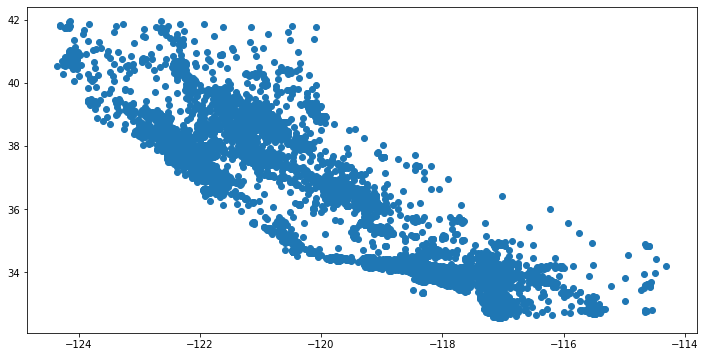

In [7]:
plt.figure(figsize=(12, 6))
plt.scatter(x=axes.longitude, y=axes.latitude)

In [8]:
import lib

In [9]:
train, test = lib.train_test_split(df, 0.2)
print(f'Train shape: {train.shape} \nTest shape: {test.shape} ')

Train shape: (16512, 10) 
Test shape: (4128, 10) 


In [10]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12069,-117.55,33.83,6.0,502.0,76.0,228.0,65.0,4.2386,500001.0,INLAND
15925,-122.44,37.73,52.0,2381.0,492.0,1485.0,447.0,4.3898,270000.0,NEAR BAY
11162,-118.00,33.83,26.0,1718.0,385.0,1022.0,368.0,3.9333,196100.0,<1H OCEAN
4904,-118.26,34.01,38.0,697.0,208.0,749.0,206.0,1.4653,118800.0,<1H OCEAN
4683,-118.36,34.08,52.0,2373.0,601.0,1135.0,576.0,3.1765,225000.0,<1H OCEAN


In [11]:
import numpy as np
df['income_cat'] = pd.cut(
    df['median_income'],
    bins=[0., 1.5, 3., 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
    )

df['income_cat']

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [13]:
train, test = lib.train_test_split(df, 0.2)
test['income_cat'].value_counts() / len(test)

3    0.354409
2    0.322190
4    0.175145
5    0.110465
1    0.037791
Name: income_cat, dtype: float64

In [14]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [15]:
df['income_cat'].value_counts() / len(df)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [16]:
df['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

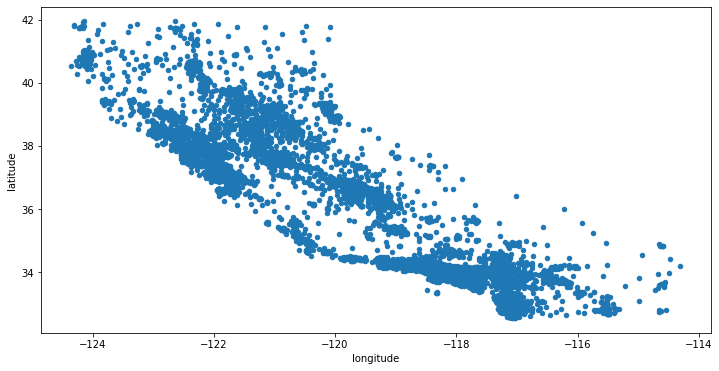

In [17]:
df.plot(kind='scatter', x='longitude', y='latitude', figsize=(12, 6))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

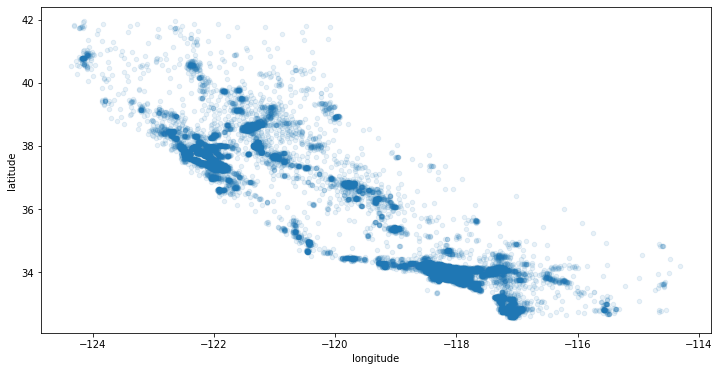

In [18]:
df.plot(kind='scatter', x='longitude', y='latitude', figsize=(12, 6), alpha=0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

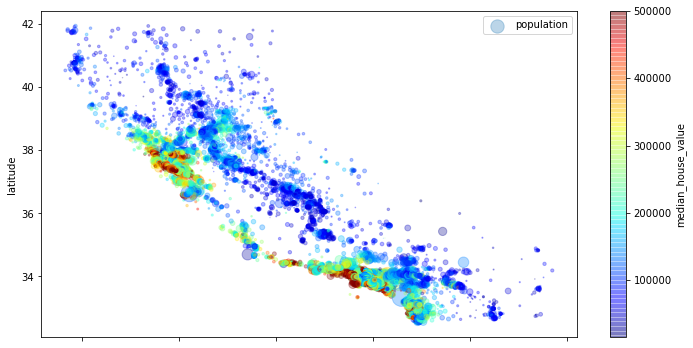

In [19]:
df.plot(kind='scatter', x='longitude', y='latitude', figsize=(12, 6), alpha=0.3,
    s=df['population'] / 100, label='population', c='median_house_value', 
    cmap=plt.get_cmap('jet'), colorbar=True)

In [20]:
corr_matrix = df.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [21]:
corr_matrix['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [22]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

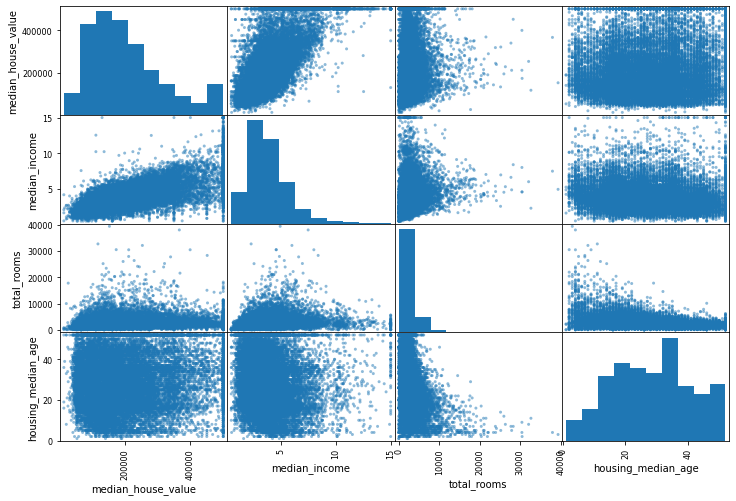

In [23]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

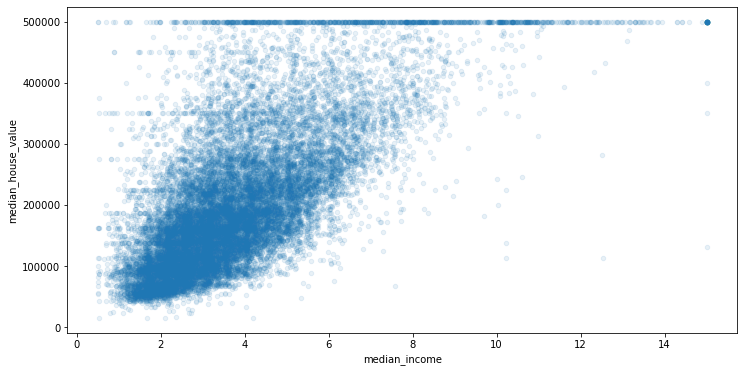

In [24]:
df.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1, figsize=(12, 6))
plt.show()

In [25]:
df.iloc[0]

longitude              -122.23
latitude                 37.88
housing_median_age        41.0
total_rooms              880.0
total_bedrooms           129.0
population               322.0
households               126.0
median_income           8.3252
median_house_value    452600.0
ocean_proximity       NEAR BAY
income_cat                   5
Name: 0, dtype: object

In [26]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_household'] = df['total_bedrooms'] / df['households']
df['population_per_household'] = df['population'] / df['households']

In [27]:
df[['rooms_per_household', 'bedrooms_per_household', 'population_per_household']]

,rooms_per_household,bedrooms_per_household,population_per_household
0,6.984127,1.023810,2.555556
1,6.238137,0.971880,2.109842
2,8.288136,1.073446,2.802260
3,5.817352,1.073059,2.547945
4,6.281853,1.081081,2.181467
...,...,...,...
20635,5.045455,1.133333,2.560606
20636,6.114035,1.315789,3.122807
20637,5.205543,1.120092,2.325635
20638,5.329513,1.171920,2.123209


In [28]:
corr_matrix = df.corr()

In [29]:
corr_matrix['median_house_value']

longitude                  -0.045967
latitude                   -0.144160
housing_median_age          0.105623
total_rooms                 0.134153
total_bedrooms              0.049686
population                 -0.024650
households                  0.065843
median_income               0.688075
median_house_value          1.000000
rooms_per_household         0.151948
bedrooms_per_household     -0.046739
population_per_household   -0.023737
Name: median_house_value, dtype: float64

# Prepare the data for machine learning algorithms

In [30]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [31]:
housing_labels.head()

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

## Data Cleaning
* Get rid of the corresponding districts.
* Get rid of the whole attribute.
* Set the values to some value (zero, the mean, the median, etc.).

In [32]:
# housing.dropna(subset=['total_bedrooms']) # option 1
# hosing.drop('total_bedrooms', axis=1) # option 2
median = housing['total_bedrooms'].median() # option 3
housing['total_bedrooms'].fillna(median, inplace=True)

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [34]:
housing # we need to get rid of ocean_proximity attribute, cuz its not numeric

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND,4
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND,2
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND,3
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN,3


In [35]:
housing_num = housing.drop('ocean_proximity', axis=1)
# then we can fit to imputer
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [37]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [38]:
x = imputer.transform(housing_num)
x

array([[-121.89  ,   37.29  ,   38.    , ...,  339.    ,    2.7042,
           2.    ],
       [-121.93  ,   37.05  ,   14.    , ...,  113.    ,    6.4214,
           5.    ],
       [-117.2   ,   32.77  ,   31.    , ...,  462.    ,    2.8621,
           2.    ],
       ...,
       [-116.4   ,   34.09  ,    9.    , ...,  765.    ,    3.2723,
           3.    ],
       [-118.01  ,   33.82  ,   31.    , ...,  356.    ,    4.0625,
           3.    ],
       [-122.45  ,   37.77  ,   52.    , ...,  639.    ,    3.575 ,
           3.    ]])

In [39]:
housing_tr = pd.DataFrame(x, columns=housing_num.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,2.0
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,5.0
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,2.0
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,2.0
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,3.0
...,...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,4.0
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,2.0
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,3.0
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,3.0


In [40]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [41]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [42]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [43]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

* Problem with this representation, ml algorithms will think like 0-1, 1-2 ... are closer than 0-4, 1-4 etc.
* But that is not the case.
* A solution to this is OneHotEncoder.

In [44]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot[:5]

<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

* Output is SciPy sparse matrix instead of NumPy array.
* Which is instead of storing all the 0's like sparse matrix, it stores only the positions of 1's.
* You can use it like 2d array but if you want to convert it to a dense NumPy array, call the toarray() method.

In [45]:
housing_cat_1hot.toarray()[:10]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [46]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Custom Transformers

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or *kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [48]:
housing.values[0]

array([-121.89, 37.29, 38.0, 1568.0, 351.0, 710.0, 339.0, 2.7042,
       '<1H OCEAN', 2], dtype=object)

In [49]:
housing_extra_attribs[0]

array([-121.89, 37.29, 38.0, 1568.0, 351.0, 710.0, 339.0, 2.7042,
       '<1H OCEAN', 2, 4.625368731563422, 2.094395280235988], dtype=object)

# Feature Scaling

In [50]:
housing_num.iloc[0]

longitude             -121.8900
latitude                37.2900
housing_median_age      38.0000
total_rooms           1568.0000
total_bedrooms         351.0000
population             710.0000
households             339.0000
median_income            2.7042
income_cat               2.0000
Name: 17606, dtype: float64

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [52]:
housing_num_tr[0]

array([-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
       -0.63621141, -0.42069842, -0.61493744, -0.95445595, -0.31205452,
       -0.08649871,  0.15531753])

In [53]:
housing_num.iloc[0]

longitude             -121.8900
latitude                37.2900
housing_median_age      38.0000
total_rooms           1568.0000
total_bedrooms         351.0000
population             710.0000
households             339.0000
median_income            2.7042
income_cat               2.0000
Name: 17606, dtype: float64

In [54]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared[0]

array([-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
       -0.63621141, -0.42069842, -0.61493744, -0.95445595, -0.31205452,
       -0.08649871,  0.15531753,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

# Select and Train a Model

In [55]:
print('X:', housing_prepared[0])
print('Y:', housing_labels[0])

X: [-1.15604281  0.77194962  0.74333089 -0.49323393 -0.44543821 -0.63621141
 -0.42069842 -0.61493744 -0.95445595 -0.31205452 -0.08649871  0.15531753
  1.          0.          0.          0.          0.        ]
Y: 452600.0


In [56]:
# Training and Evaluating on the Training Set
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [57]:
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions: ', lin_reg.predict(some_data_prepared))
print('Actual Labels:', some_labels.values)

Predictions:  [203682.37379543 326371.39370781 204218.64588245  58685.4770482
 194213.06443039]
Actual Labels: [286600. 340600. 196900.  46300. 254500.]


* Measuring RMSE: Root Mean Squared Error

In [58]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.64295459937

* 68,376$ error in average is not good.
* Expecially when median_housing_values lies between 120,000$ and 265,000$.
* There is an obvious underfitting.
* Features and our method are not enough to make good predictions.

Lets try little more complex model.

In [59]:
housing_prepared[2]

array([ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
       -0.43363936, -0.0933178 , -0.5320456 , -0.95445595, -0.46531516,
       -0.09240499,  0.4222004 ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ])

In [60]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [61]:
housing_predictions2 = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions2)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [62]:
housing_predictions2

array([286600., 340600., 196900., ...,  97800., 225900., 500001.])

* 0.0 errors is not good at all.
* This means our model overfitted to data.
* Sometimes this can be a very big problem.

Now we ll use K-Fold Cross Validation Technique which is used for prevent overfitting.

In [63]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([69404.58870689, 66176.480992  , 71044.68117569, 69671.41555303,
       70845.68349547, 74959.27836826, 71343.68898684, 72081.50546318,
       76476.27849169, 70132.39963398])

In [64]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-scores)
lin_rmse_scores

array([66877.52325028, 66608.120256  , 70575.91118868, 74179.94799352,
       67683.32205678, 71103.16843468, 64782.65896552, 67711.29940352,
       71080.40484136, 67687.6384546 ])

In [65]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())

In [66]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=50) # 100 is default value
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(n_estimators=50)

In [67]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, 
    scoring='neg_mean_squared_error', cv=10)

forest_reg_scores = np.sqrt(-scores)
display_scores(forest_reg_scores)

Scores: [49677.75144792 47643.84925648 49602.01718788 52546.74191594
 50040.07646923 53809.16494481 49471.20556983 48868.03803105
 53540.11894247 50573.24102448]
Mean: 50577.220479007854
Standard Deviation: 1946.8203023011115


# Saving Model

In [68]:
import joblib

joblib.dump(lin_reg, './models/lin_reg.pkl')
joblib.dump(tree_reg, './models/tree_reg.pkl')
joblib.dump(forest_reg, './models/forest_reg.pkl')

['./models/forest_reg.pkl']

In [69]:
lin_reg = joblib.load('./models/lin_reg.pkl')
tree_reg = joblib.load('./models/tree_reg.pkl')
forest_reg = joblib.load('./models/forest_reg.pkl')

In [70]:
predictions = lin_reg.predict(housing_prepared)

In [71]:
predictions

array([203682.37379543, 326371.39370781, 204218.64588245, ...,
        98401.39527017, 212187.94436578, 278353.72728836])

# Fining-Tuning Model

* Scikit-Learn GridSearchCV basically searchs for different combinations of hyperparameters.

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': ['False'], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',
    return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': ['False'], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [73]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [74]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [75]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63250.293489175434 {'max_features': 2, 'n_estimators': 3}
56032.511708373975 {'max_features': 2, 'n_estimators': 10}
53470.16015572569 {'max_features': 2, 'n_estimators': 30}
60561.140743707474 {'max_features': 4, 'n_estimators': 3}
54179.272772382166 {'max_features': 4, 'n_estimators': 10}
51514.12913594331 {'max_features': 4, 'n_estimators': 30}
59574.7362898214 {'max_features': 6, 'n_estimators': 3}
53259.17189506247 {'max_features': 6, 'n_estimators': 10}
50846.03556034593 {'max_features': 6, 'n_estimators': 30}
58892.29380057578 {'max_features': 8, 'n_estimators': 3}
52641.80131550663 {'max_features': 8, 'n_estimators': 10}
50901.78200623331 {'max_features': 8, 'n_estimators': 30}
63643.92127608112 {'bootstrap': 'False', 'max_features': 2, 'n_estimators': 3}
56110.50998166895 {'bootstrap': 'False', 'max_features': 2, 'n_estimators': 10}
62193.03559567461 {'bootstrap': 'False', 'max_features': 3, 'n_estimators': 3}
54720.334303078904 {'bootstrap': 'False', 'max_features': 3, 'n_est

In [76]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.22486112e-02, 5.44203598e-02, 4.66947572e-02, 1.83408578e-02,
       1.79749077e-02, 1.82223616e-02, 1.88876748e-02, 3.15580195e-01,
       9.27521393e-02, 4.22605960e-02, 1.03191856e-01, 5.45913901e-02,
       8.96738538e-03, 1.37815489e-01, 1.56385257e-04, 2.82140204e-03,
       5.07363106e-03])

In [77]:
extra_atribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_hhold']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_atribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.31558019510897495, 'median_income'),
 (0.1378154894075559, 'INLAND'),
 (0.103191856253301, 'pop_per_hhold'),
 (0.09275213927781194, 'income_cat'),
 (0.06224861121488405, 'longitude'),
 (0.05459139011350058, 'bedrooms_per_hhold'),
 (0.05442035981106185, 'latitude'),
 (0.04669475719362926, 'housing_median_age'),
 (0.04226059597605043, 'rooms_per_hhold'),
 (0.01888767478027474, 'households'),
 (0.018340857799207345, 'total_rooms'),
 (0.018222361627148402, 'population'),
 (0.017974907701079793, 'total_bedrooms'),
 (0.008967385376711563, '<1H OCEAN'),
 (0.005073631058959625, 'NEAR OCEAN'),
 (0.002821402042405286, 'NEAR BAY'),
 (0.00015638525744337533, 'ISLAND')]

# Evaluate System on Test Set

In [78]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3
...,...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,76400.0,INLAND,2
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,134000.0,NEAR OCEAN,2
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,311700.0,<1H OCEAN,4
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,133500.0,INLAND,4


In [79]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [80]:
final_rmse

48495.395205600485

In [92]:
for predicted, actual in zip(final_model.predict(X_test_prepared[25:30]), y_test[25:30]):
    print(f'Predicted:{predicted}\nActual:{actual}\n---------------------------')

Predicted:108410.0
Actual:212500.0
---------------------------
Predicted:302096.6666666667
Actual:400000.0
---------------------------
Predicted:217023.33333333334
Actual:251600.0
---------------------------
Predicted:191860.0
Actual:208800.0
---------------------------
Predicted:128450.0
Actual:105200.0
---------------------------


* In some cases, such a point estimate of the generalization error will not be quite
enough to convince you to launch.
* For this, you can compute a 95% confidence interval for the generalization error using
scipy.stats.t.interval():

In [93]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
    loc=squared_errors.mean(),
    scale=stats.sem(squared_errors)))

array([46555.60697226, 50360.52195658])